In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix


In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [4]:
# Load the training dataset
instagram_df_train = pd.read_csv('insta_train.csv')

In [5]:
# Load the testing data
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [6]:
instagram_df_test = pd.read_csv('insta_test.csv')
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


MINI CHALLENGE #1:
- Print the first and last 5 rows in both the training and testing DataFrames


In [7]:
instagram_df_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [8]:
instagram_df_test.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


In [9]:
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [10]:
# Getting dataframe info


In [11]:
# Get the statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [12]:
# Checking if null values exist
instagram_df_train.isnull().sum(axis = 0)

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [13]:
# Get the number of unique values in the "profile pic" feature
instagram_df_train['profile pic'].unique()

array([1, 0], dtype=int64)

In [14]:
# Get the number of unique values in "fake" (Target column)
instagram_df_train['fake'].value_counts()

1    288
0    288
Name: fake, dtype: int64

MINI CHALLENGE #2:
- Perform exploratory data analysis on the testing dataset

In [15]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [16]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [17]:
instagram_df_test.isnull().sum(axis = 0)

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [18]:
instagram_df_test['profile pic'].value_counts()

1    91
0    29
Name: profile pic, dtype: int64

In [19]:
instagram_df_test['fake'].value_counts()

1    60
0    60
Name: fake, dtype: int64

<AxesSubplot:xlabel='fake', ylabel='count'>

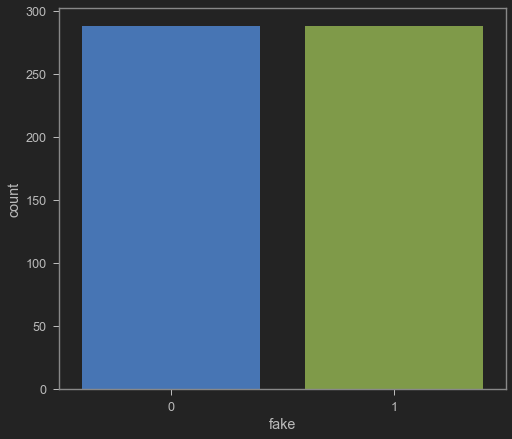

In [20]:
# Visualize the data
sns.countplot(instagram_df_train['fake'])

<AxesSubplot:xlabel='private', ylabel='count'>

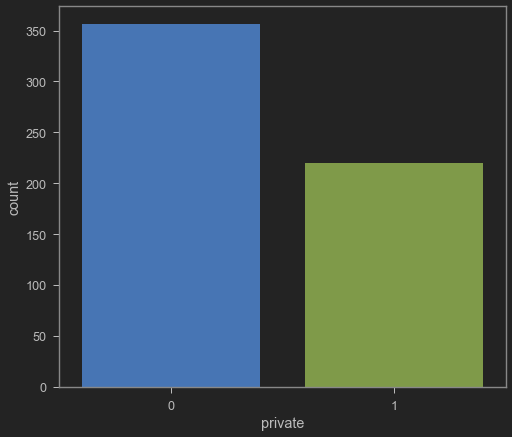

In [21]:
# Visualize the private column data
sns.countplot(instagram_df_train['private'])

<AxesSubplot:xlabel='profile pic', ylabel='count'>

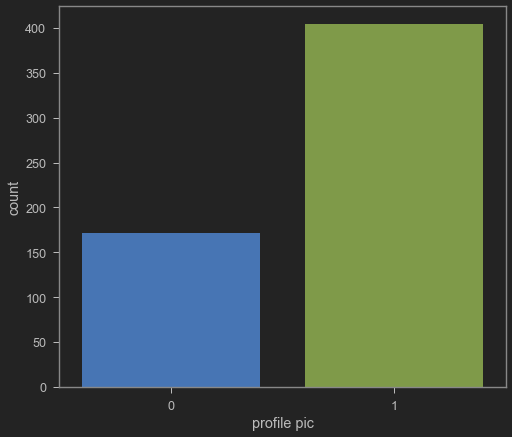

In [22]:
# Visualize the "profile pic" column data
sns.countplot(instagram_df_train['profile pic'])

In [23]:
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


<AxesSubplot:xlabel='nums/length username', ylabel='Density'>

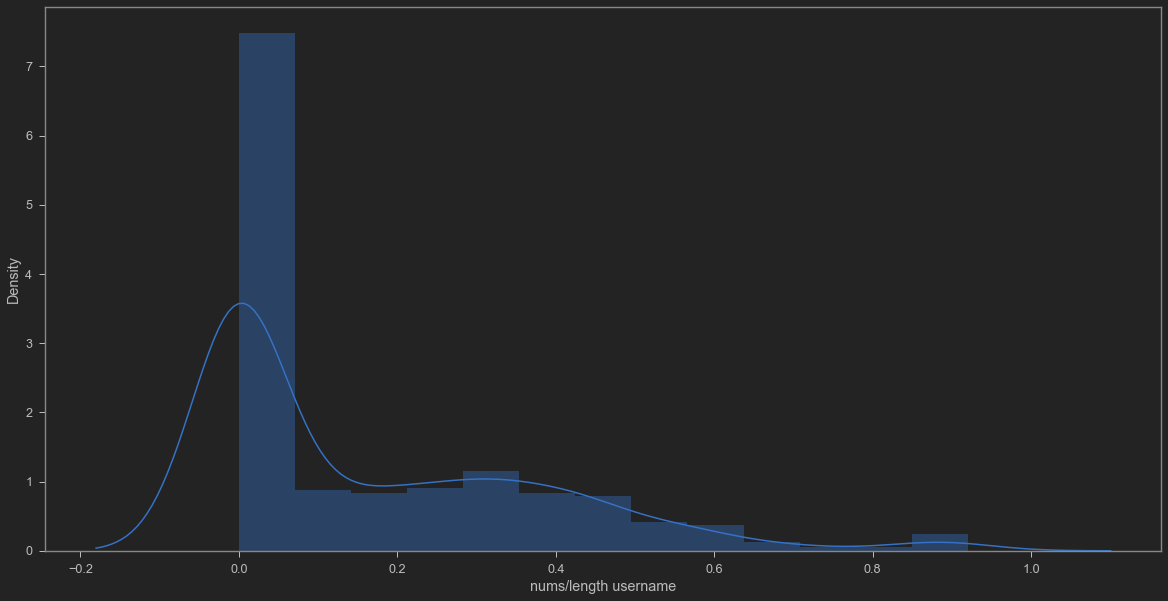

In [24]:
# Visualize the data
plt.figure(figsize = (20, 10))
sns.distplot(instagram_df_train['nums/length username'])

In [25]:
# Plot pairplot
plt.figure(figsize = (20, 20))
#sns.pairplot(instagram_df_train)

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

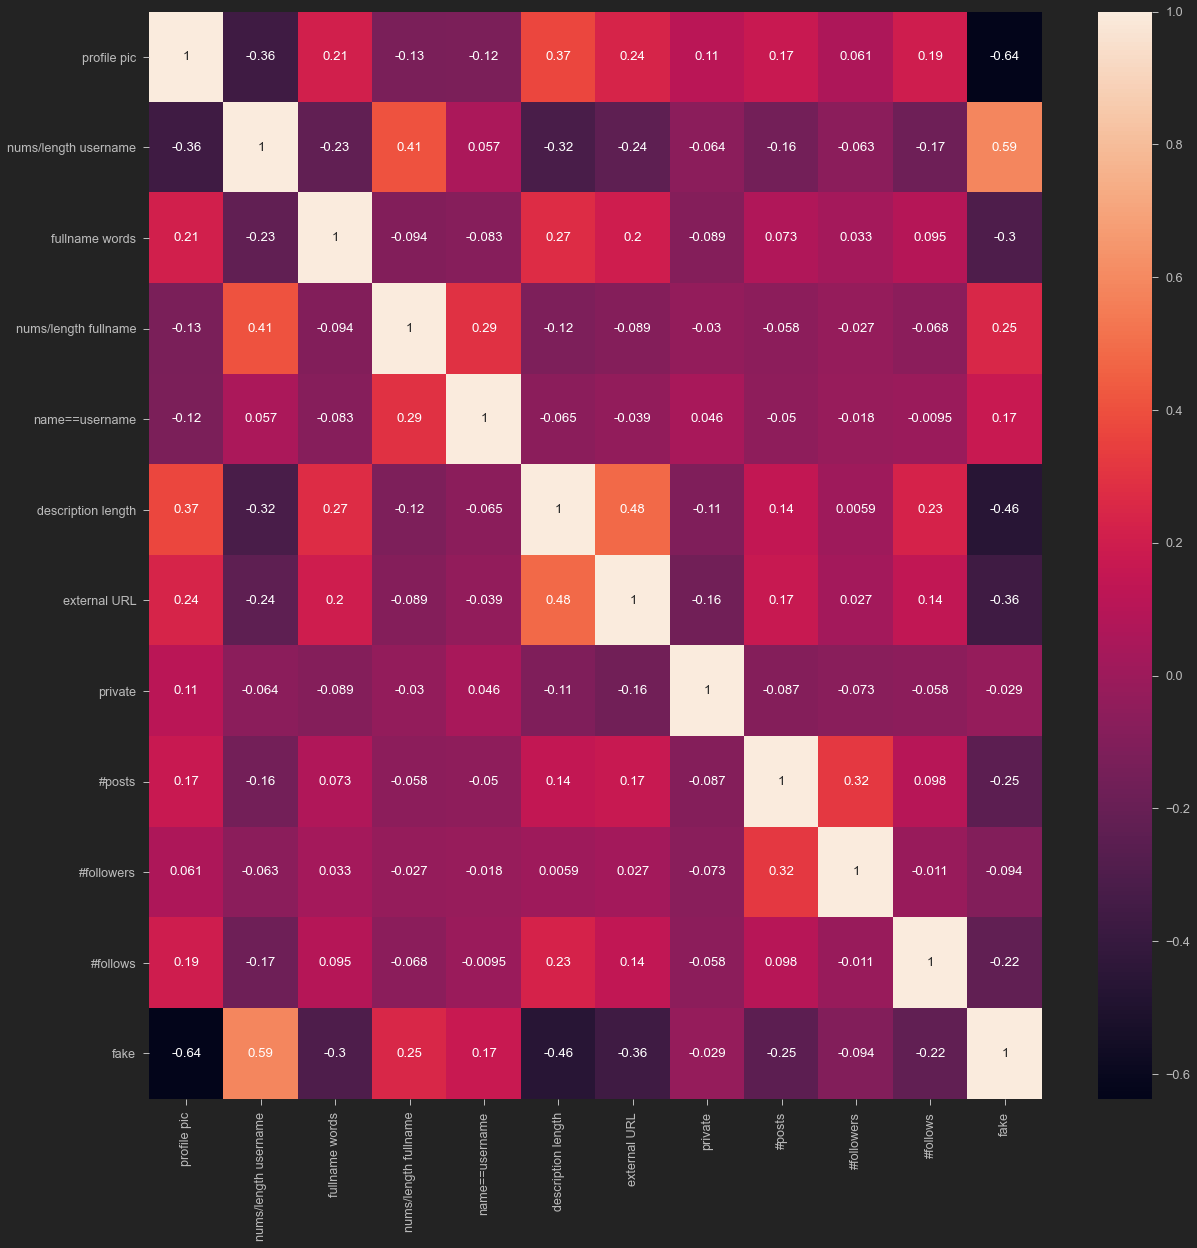

In [26]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

MINI CHALLENGE #3:
- Plot the count plot for 'fake', 'profile pic' and 'private' testing dataset

<AxesSubplot:xlabel='profile pic', ylabel='count'>

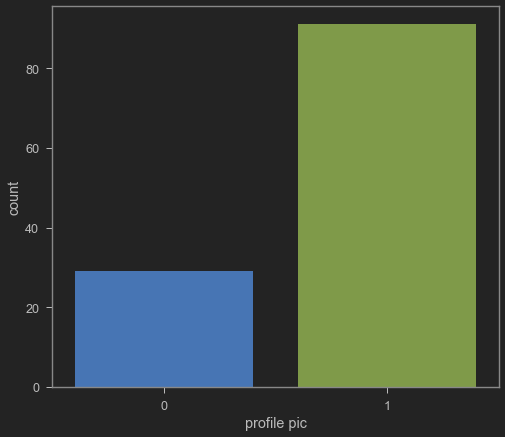

In [27]:
sns.countplot(instagram_df_test['profile pic'])

<AxesSubplot:xlabel='fake', ylabel='count'>

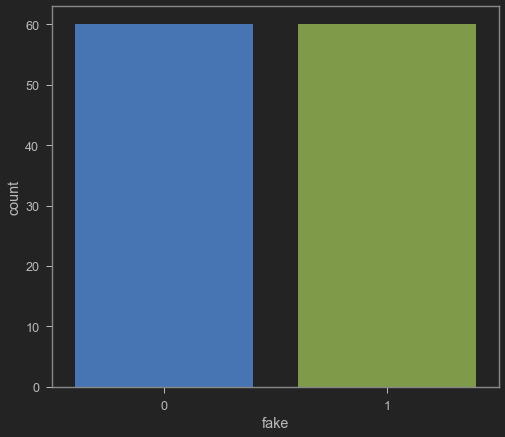

In [28]:
sns.countplot(instagram_df_test['fake'])

<AxesSubplot:xlabel='private', ylabel='count'>

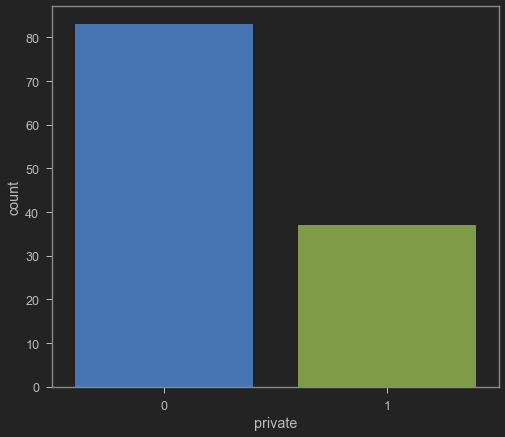

In [29]:
sns.countplot(instagram_df_test['private'])

In [30]:
# Training and testing dataset (inputs)
X_train = instagram_df_train.drop(columns = ['fake'])
X_test = instagram_df_test.drop(columns = ['fake'])


In [31]:
X_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [32]:
# Training and testing dataset (Outputs)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

In [33]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [34]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [35]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.fit_transform(X_test)


In [36]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)
# for training the neural network we need the output to be a matrix hence this function is used

In [37]:
# if fake 0 1 if not fake 1 0

In [38]:
X_train.shape

(576, 11)

In [39]:
X_test.shape

(120, 11)

In [40]:
len(X_train) / (len(X_train) + len(X_test))

0.8275862068965517

In [41]:
import tensorflow.keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout 
model = Sequential()
# 50 because we want 50 neurons input_dimension are number of input layers
model.add(Dense(50, input_dim = 11, activation = 'relu'))
model.add(Dense(150, activation= 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 302       
Total params: 31,202
Trainable params: 31,202
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])


In [52]:
epochs_hist = model.fit(X_train, y_train, epochs = 30,  verbose = 1, validation_split = 0.1)

Epoch 1/30
17/17 [==============================] - 0s 9ms/step - loss: 0.1181 - accuracy: 0.9421 - val_loss: 0.1453 - val_accuracy: 0.9138
Epoch 2/30
17/17 [==============================] - 0s 5ms/step - loss: 0.1291 - accuracy: 0.9479 - val_loss: 0.1774 - val_accuracy: 0.9138
Epoch 3/30
17/17 [==============================] - 0s 5ms/step - loss: 0.1122 - accuracy: 0.9595 - val_loss: 0.3563 - val_accuracy: 0.8448
Epoch 4/30
17/17 [==============================] - 0s 5ms/step - loss: 0.1168 - accuracy: 0.9498 - val_loss: 0.2467 - val_accuracy: 0.9138
Epoch 5/30
17/17 [==============================] - 0s 6ms/step - loss: 0.1149 - accuracy: 0.9498 - val_loss: 0.1269 - val_accuracy: 0.9310
Epoch 6/30
17/17 [==============================] - 0s 4ms/step - loss: 0.1247 - accuracy: 0.9537 - val_loss: 0.3284 - val_accuracy: 0.8621
Epoch 7/30
17/17 [==============================] - 0s 5ms/step - loss: 0.1072 - accuracy: 0.9498 - val_loss: 0.3932 - val_accuracy: 0.7931
Epoch 8/30
17/17 [==

MINI CHALLENGE #5:
- Add a new hidden layer with 25 neurons and 'relu' activation function
- Print out the model summary and inicate how many trainable parameters

In [44]:
model2 = Sequential()
model2.add(Dense(50, input_dim = 11, activation = 'relu')) 
model2.add(Dense(150, activation = 'relu'))
model2.add(Dropout(0.3))
#model2.add(Dense(150, activation = 'relu'))

#model2.add(Dropout(0.3))
model2.add(Dense(25, activation = 'relu'))
model2.add(Dropout(0.3))
model2.add(Dense(2, activation = 'softmax'))
model2.summary()

model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
epochs_hist = model2.fit(X_train,y_train, epochs = 20, verbose = 1, validation_split = 0.1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 150)               7650      
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 25)                3775      
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 52        
Total params: 12,077
Trainable params: 12,077
Non-trainable params: 0
__________________________________________________

In [45]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


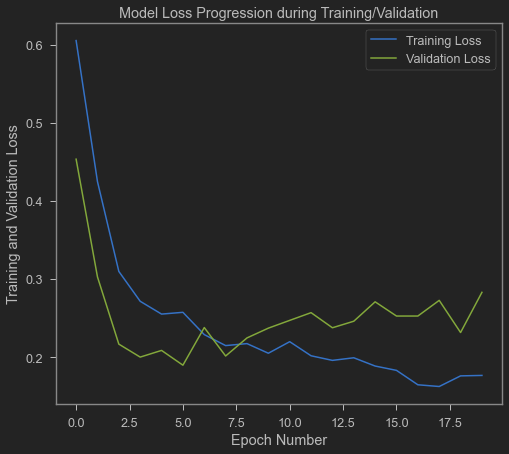

In [46]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progression during Training/Validation')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss','Validation Loss'])

In [47]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


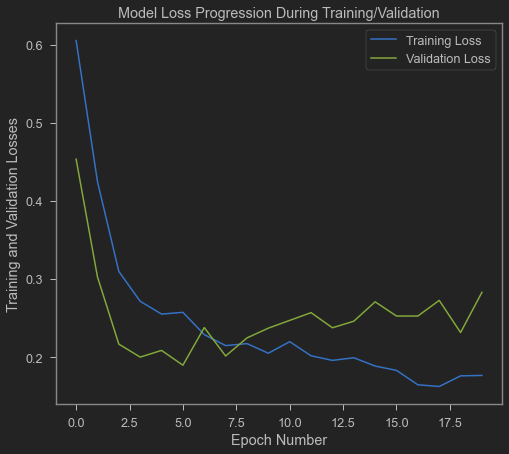

In [48]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [49]:
predicted = model.predict(X_test)
predicted_value = []
test = []

for i in predicted:
    predicted_value.append(np.argmax(i))

for j in y_test:
    test.append(np.argmax(j))

In [50]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        60
           1       0.91      0.88      0.90        60

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



<AxesSubplot:>

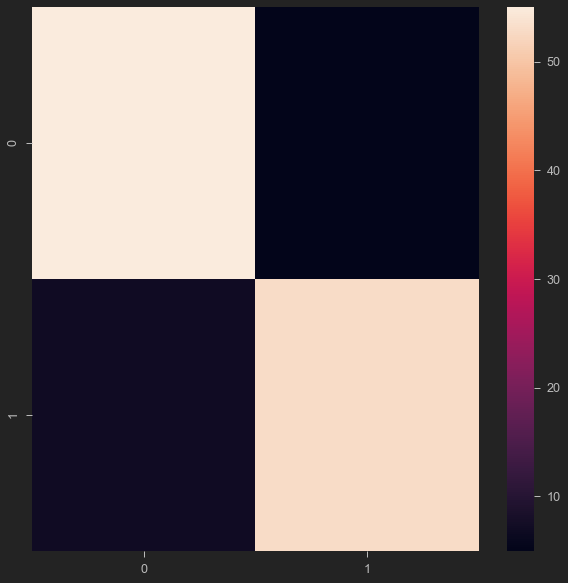

In [51]:
plt.figure(figsize=(10, 10))
y = confusion_matrix(test,predicted_value)
sns.heatmap(y)

MINI CHALLENGE #6:
- Retrain the model for more epochs (30) and reassess model performance. Comment on the results.